**import Area**

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

#classifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


**Dataset loading**

In [44]:
df = pd.read_csv('employee_shortlisting.csv')
df.head(3)
df.isnull().sum()

Interview_Score    0
Skills_Matched     0
Shortlisted        0
dtype: int64

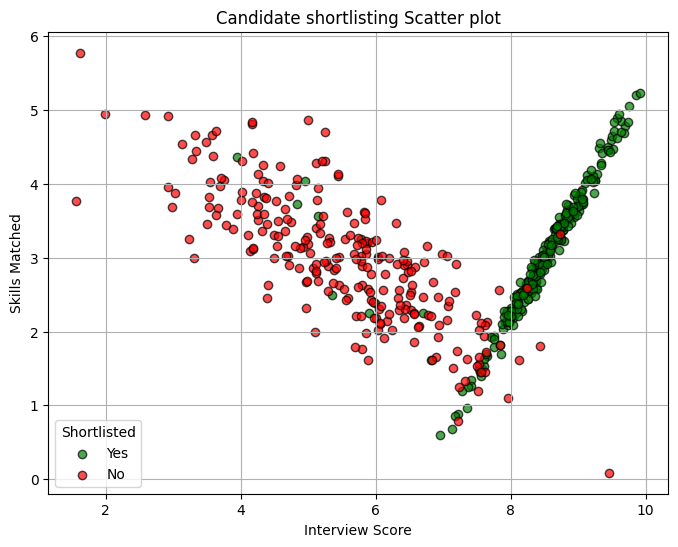

Interview_Score    0
Skills_Matched     0
Shortlisted        0
dtype: int64

In [45]:
#scatter plot
plt.figure(figsize=(8,6))
colors = {'Yes':'green','No':'red'}

for label in df['Shortlisted'].unique():
    subset = df[df['Shortlisted'] == label]
    plt.scatter(subset['Interview_Score'],subset['Skills_Matched'],c=colors[label],label=label,alpha=0.7,edgecolors='k')

plt.title("Candidate shortlisting Scatter plot")
plt.xlabel("Interview Score")
plt.ylabel("Skills Matched")
plt.legend(title="Shortlisted")
plt.grid(True)
plt.show()
df.isnull().sum()

**Model Building**

In [46]:
#Feature and Target : (feature engineering)
df['Shortlisted'] = df['Shortlisted'].map({'Yes':1,'No':0})
X = df[["Interview_Score","Skills_Matched"]].values.astype(float)
y = df["Shortlisted"].values.astype(int)

#split data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#Define Classifier
models = {
    "Logistic Regression":LogisticRegression(),
    "KNN":KNeighborsClassifier(n_neighbors = 3),
    "Decision Tree" :DecisionTreeClassifier(max_depth=5,random_state=42),
    "Random Forest" :RandomForestClassifier(n_estimators=100,max_depth=5,random_state=42),
    "svc":SVC(kernel='rbf')
}

for name,model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(name,"Accuracy Score",round(accuracy_score(y_test,y_pred),2))
    

Logistic Regression Accuracy Score 0.9
KNN Accuracy Score 0.95
Decision Tree Accuracy Score 0.93
Random Forest Accuracy Score 0.93
svc Accuracy Score 0.92


Logistic Regression Accuracy Score 0.9
KNN Accuracy Score 0.95
Decision Tree Accuracy Score 0.93
Random Forest Accuracy Score 0.93
svc Accuracy Score 0.92


AttributeError: 'PathCollection' object has no attribute 'legend'

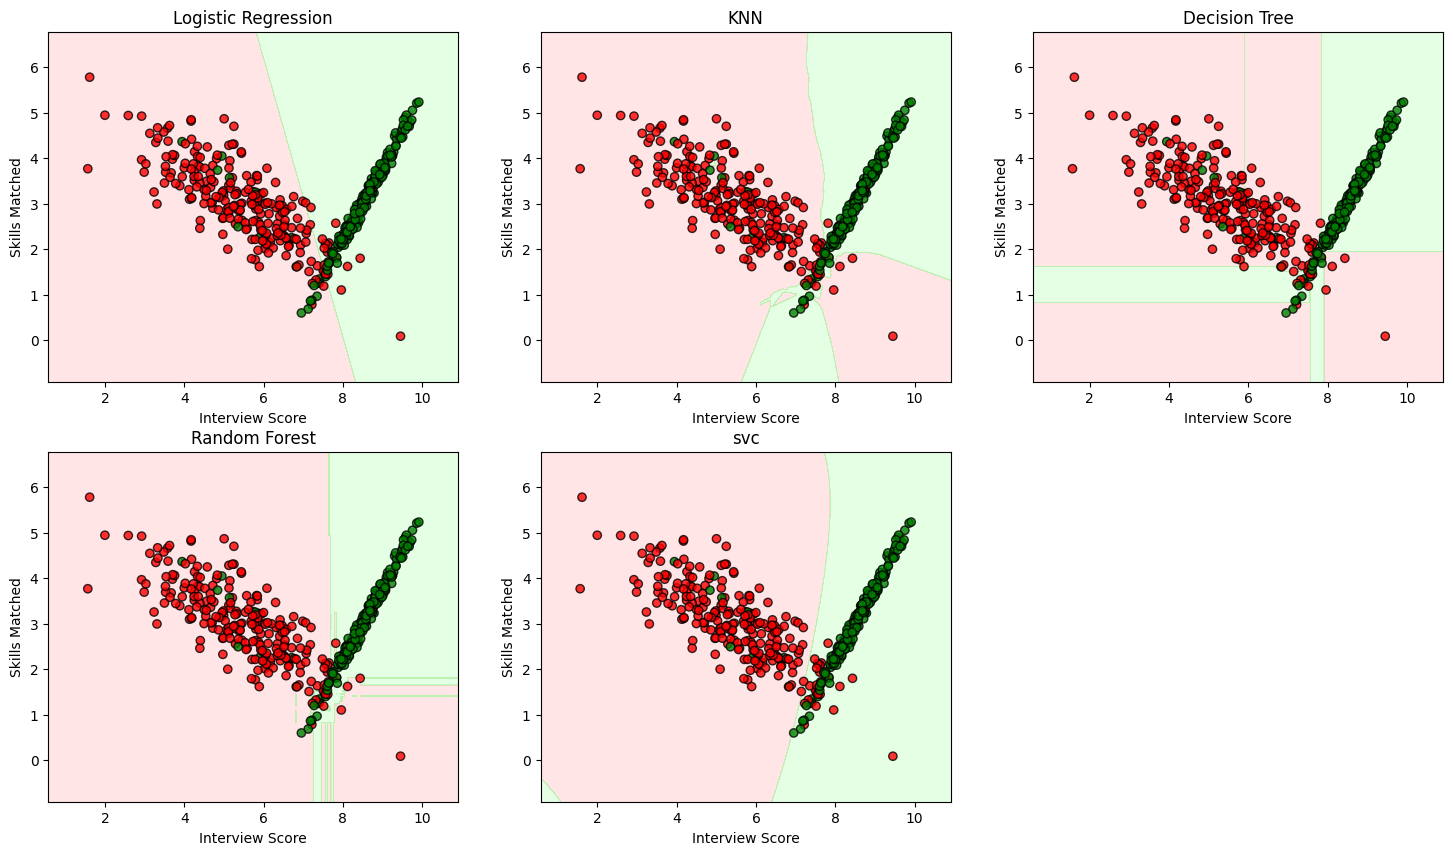

In [48]:
#creating mesh grid for ploting 
x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
y_min,y_max=X[:,1].min()-1,X[:,1].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,0.01),
                 np.arange(y_min,y_max,0.01))

#plot the Decision Boundries
fig,axes = plt.subplots(2,3,figsize=(18,10))
axes = axes.ravel()
cmap_light = ListedColormap(['#FFAAAA','#AAFFAA'])
cmap_bold = ['red','green']

for idx ,(name,model) in enumerate(models.items()):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(name,"Accuracy Score",round(accuracy_score(y_test,y_pred),2))

    Z = model.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)

    axes[idx].contourf(xx,yy,Z,alpha=0.3,cmap=cmap_light)
    scatter = axes[idx].scatter(X[:,0],X[:,1],c=y,cmap=ListedColormap(cmap_bold),edgecolor='k',alpha=0.8)
    axes[idx].set_title(name)
    axes[idx].set_xlabel("Interview Score")
    axes[idx].set_ylabel("Skills Matched")

#hide unused subplot
fig.delaxes(axes[-1])
#add legend
fig.legend(*scatter.legend(),loc='lower-center',ncol=2,title="Shortlisted")

plt.tight_layout()
plt.show()
    

**Regressors**

In [52]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [53]:
df = pd.read_csv('marketing_spend.csv')
df.head(3)

,Date,Marketing_Spend_1000s,Employee_Count,Product_Rating,Customer_Acquisition_Cost,Quarterly_Revenue,Annual_Revenue,Customer_Lifetime_Value
0,2024-01-01,43.708611,18.250200,7.283455,1910.442649,265.106375,273.074702,354.029924
1,2024-01-02,95.564288,22.329398,5.824867,9132.533060,687.783503,567.896906,1012.873825
2,2024-01-03,75.879455,43.301150,3.785749,5757.691655,518.959402,520.257186,800.570271


In [75]:
X=df[['Marketing_Spend_1000s','Employee_Count','Product_Rating']]
y=df['Quarterly_Revenue']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#define models 
models = {
    "KNN" : KNeighborsRegressor(n_neighbors = 5),
    "Decision Tree" : DecisionTreeRegressor(max_depth=3,random_state=42),
    "Random Forest" : RandomForestRegressor(max_depth=5,random_state=42),
    "SVR" : SVR(kernel='linear')
}


for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{name}:")
    print(f"  R2 Score: {round(r2, 2)}")
    print(f"  MAE: {round(mae, 2)}")
    print(f"  MSE: {round(mse, 2)}\n")

KNN:
  R2 Score: 0.92
  MAE: 25.05
  MSE: 1751.53

Decision Tree:
  R2 Score: 0.86
  MAE: 39.49
  MSE: 2893.15

Random Forest:
  R2 Score: 0.91
  MAE: 26.56
  MSE: 1909.51

SVR:
  R2 Score: 0.94
  MAE: 14.63
  MSE: 1316.27

